<a href="https://colab.research.google.com/github/wasjediknight/rocketseat/blob/main/Estimativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A atividade a ser desenvolvida no Colab deve conter as seguintes seções
- Introdução
 * apresentar os dados que serão analisados
- Regressão a serem utilizadas
 * Linear Simples e Múltipla
 * Linear Lasso + Rígida
 * Verificação de Colinearidade
 * Polinomial
- Resultados e Discussão
 * discussão sobre os resultados obtidos
 * apresentando as vantagens e desvantagens nos algoritmos utilizados
- Dificuldades e Desafios
 * apresentar as dificuldades encontradas e desafios superados para o
desenvolvimento da atividade
- Referência
 * artigos, livros, sites e outras fontes utilizadas
 * seguir o padrão ABNT

In [6]:
# Main libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Machine Learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Preprocessig libraries
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Visual libraries
import plotly.graph_objs as go
from yellowbrick.regressor import ResidualsPlot
import plotly.figure_factory as ff
from plotly.offline import iplot
from matplotlib import pyplot as plt
import plotly.offline as py

# Statistical library
import statsmodels.api as sm

# Upload data library

from google.colab import drive
drive.mount('/content/gdrive')

est = pd.read_csv('gdrive/My Drive/TRF/historicov3.csv',encoding='latin1') #charset

#est.head()
est = est[est['tipo_os']=='Manutencao Evolutiva']

est = est[est['descricao']=='OS faturada']
est = est[est['linguagem_programacao']=='PHP']

#est = est[est['id_os']!='ESOCIAL-2262']
#est = est[est['id_os']!='JEFVIRTUAL-79']

X = est.iloc[:,5:8].values
y = est.iloc[:,4].values

est.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,id,id_os,tipo_os,linguagem_programacao,prazo_contratual_dias_uteis,contagem_estimada_pf,contagem_bruta_pf_fsw,contagem_liquida_ajustada_pf_fsw,descricao,tempo_fsw_dias_uteis,tempo_trf1_dias_uteis,tempo_fsw_dias_corridos_exclui_feriados,tempo_trf1-d_corr_inc_fer,tempo_fws_seg_uteis,tempo_trf1_seg_uteis,tempo_fsw_seg_corr_exc_fer,tempo_trf1_seg_corr_inc_feriados
902,26014,EORCAMENTO-26,Manutencao Evolutiva,PHP,80.0,72.0,71.0,42.6,OS faturada,5d 6h 22m,132d 9h 58m,7d 6h 22m,374d 6h 58m,256920,6213500,627720,17528300
903,26016,EORCAMENTO-2,Manutencao Evolutiva,PHP,10.0,5.0,5.0,3.0,OS faturada,7d 1h 7m,168d 8h 58m,9d 1h 7m,468d 7h 58m,331620,7894690,781620,21931100
904,26021,EORCAMENTO-1,Manutencao Evolutiva,PHP,10.0,4.0,7.0,4.2,OS faturada,6d 0h 19m,111d 8h 58m,8d 0h 19m,313d 6h 58m,281940,5227110,692340,14673500
905,26022,EORCAMENTO-28,Manutencao Evolutiva,PHP,10.0,5.0,6.0,3.6,OS faturada,6d 5h 45m,111d 8h 53m,8d 5h 45m,313d 6h 53m,301500,5226830,711900,14673200
906,26026,EORCAMENTO-33,Manutencao Evolutiva,PHP,10.0,5.0,6.0,3.6,OS faturada,1d 6h 9m,116d 8h 51m,1d 6h 9m,326d 5h 51m,68940,5460710,108540,15277900


**Análise**

A base de dados tem 470 estimativas dos mais variados projetos, para fins do trabalho selecionei apenas estimativas de projetos da fábrica em PHP que são 70 projetos como mostrado acima na contagem.

In [7]:
#est = est[est['tipo_os']=='Ordem de Servico']
#est = est[est['tipo_os']=='Manutencao Evolutiva']

#est = est[est['descricao']=='OS faturada']

X = est.iloc[:,5:8].values
y = est.iloc[:,4].values

#print(X)

cont_est = np.reshape(X[:,0], (-1,1))
cont_bruta = np.reshape(X[:,1], (-1,1))
cont_liq = np.reshape(X[:,2], (-1,1))


#print(cont_bruta)
#
cont_est_lr = LinearRegression()
cont_est_lr.fit(cont_est, y)

#
cont_bruta_lr = LinearRegression()
cont_bruta_lr.fit(cont_bruta, y)


#
cont_liq_lr = LinearRegression()
cont_liq_lr.fit(cont_liq, y)

fig = go.Figure()

fig.add_trace(go.Scatter(x=cont_bruta.T[0], y=y, name='cont_bruta', mode='markers'))
fig.add_trace(go.Scatter(x=cont_est.T[0], y=y, name='cont_est', mode='markers'))
fig.add_trace(go.Scatter(x=cont_liq.T[0], y=y, name='cont_liq', mode='markers'))

fig.add_trace(go.Scatter(x=cont_bruta.T[0], y=cont_bruta_lr.predict(cont_bruta), mode='lines', name='cont_bruta'))
fig.add_trace(go.Scatter(x=cont_est.T[0], y=cont_est_lr.predict(cont_est), mode='lines', name='cont_est'))
fig.add_trace(go.Scatter(x=cont_liq.T[0], y=cont_liq_lr.predict(cont_liq), mode='lines', name='cont_liq'))

fig.update_layout(xaxis={"title": "Contagem"},
                  yaxis={"title": "Prazo em Dias"})

fig.show()

print(cont_bruta_lr.predict([[200.0]]))
print(cont_bruta_lr.coef_[0], cont_bruta_lr.intercept_ )
print(cont_est_lr.coef_[0], cont_est_lr.intercept_ )

[121.7802185]
0.5457898914575628 12.622240203584969
0.8681459713590782 7.615803190612969


**Análise**

Para a RL do contagem bruta o coeficiente é de 0.5457898914575628 , ou seja a cada prazo em dia temos a entrega de 0.5457898914575628  PF sendo o ponto de interseção 12.62.

Para a RL da contagem estimada o coeficiente é de 0.8681459713590782, ou seja a cada prazo em dia temos a entrega de 0.8681459713590782 PF sendo o ponto de interseção 7.61.

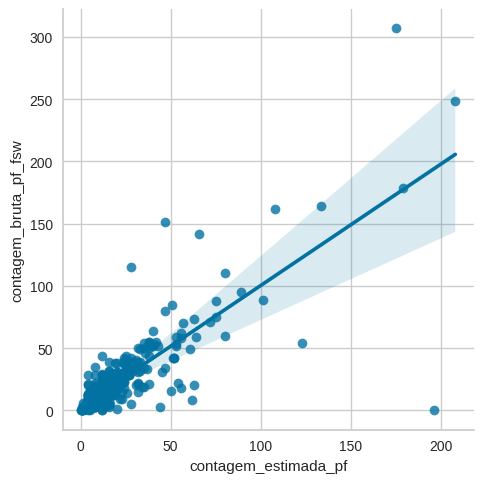

In [43]:
sns.lmplot(x='contagem_estimada_pf',y='contagem_bruta_pf_fsw', data=est)

In [9]:
print(cont_est_lr.coef_[0],cont_est_lr.intercept_)
print(cont_bruta_lr.coef_[0],cont_bruta_lr.intercept_)
print(cont_liq_lr.coef_[0],cont_liq_lr.intercept_)

0.8681459713590782 7.615803190612969
0.5457898914575628 12.622240203584969
1.1403964568021214 10.968779483015776


In [10]:
#https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01
temp2 = sm.add_constant(cont_bruta)
PFBRT_OLS = sm.OLS(y, temp2)
PFBRT_OLS = PFBRT_OLS.fit()
print(PFBRT_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.92e-20
Time:                        02:43:47   Log-Likelihood:                -298.58
No. Observations:                  70   AIC:                             601.2
Df Residuals:                      68   BIC:                             605.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6222      2.565      4.922      0.0

In [11]:
np.sqrt(PFBRT_OLS.scale)

np.float64(17.479004182187257)

**Análise**

x1 = 0.000 eu posso negar a hipótese nula ou seja há uma relação entre os meus elementos (linear).
O meu R² que é chamado de coeficiente de explicação é de 0.716, ou seja de 100 vezes que fizermos uma estimativa em 71% das vezes temos a chance de acertar o resultado, essa valor muda se tivessmos eliminação de outliers que poderíamos analisar devido a falta de condições reais de entregar projetos muito grandes em PF em pouco prazo de tempo.
O nosso erro residual padrão é de 17.479004182187257



In [12]:
temp3 = sm.add_constant(cont_est)
PFEST_OLS = sm.OLS(y, temp3)
PFEST_OLS = PFEST_OLS.fit()
print(PFEST_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2346.
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.90e-54
Time:                        02:43:52   Log-Likelihood:                -217.70
No. Observations:                  70   AIC:                             439.4
Df Residuals:                      68   BIC:                             443.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6158      0.830      9.179      0.0

In [13]:
np.sqrt(PFEST_OLS.scale)

np.float64(5.504505085995582)

**Análise**

A contagem estimada nesse tipo de demanda, tendo o R² um coeficiente de explicação de 0.972 com o prazo. Isso demostra uma boa relação entre as variáveis *x* e *y* da nossa regressão.




In [14]:
temp4 = sm.add_constant(cont_liq)
PFLIQ_OLS = sm.OLS(y, temp4)
PFLIQ_OLS = PFLIQ_OLS.fit()
print(PFLIQ_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 13 May 2025   Prob (F-statistic):           3.03e-19
Time:                        02:43:56   Log-Likelihood:                -300.97
No. Observations:                  70   AIC:                             605.9
Df Residuals:                      68   BIC:                             610.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9688      2.746      3.994      0.0

In [15]:
np.sqrt(PFLIQ_OLS.scale)

np.float64(18.08638208024849)

**Análise**

A contagem liquida já não tem um alto grau coeficiente de explicação nesse tipo de demanda, tendo o R² de 0.696 com o prazo.
Pode se perceber então que a melhor contagem é a estimada (isso é uma surpresa) porque ela normalmente é realizada no ínicio do projeto e sua relação com o prazo é a que mostra maior coeficiente de explicação, antes de analisar os dados eu acreditava que seria a contagem bruta, já que a contagem liquida leva em consideração alguns deflatores contratuais.

In [16]:
print(np.sqrt(PFEST_OLS.scale))
print(np.sqrt(PFBRT_OLS.scale))
print(np.sqrt(PFLIQ_OLS.scale))

5.504505085995582
17.479004182187257
18.08638208024849


**Análise**

A acurácia do modelo é melhor para a regressão linear da contagem estimada, o erro residual é o menor entre os 3 modelos.

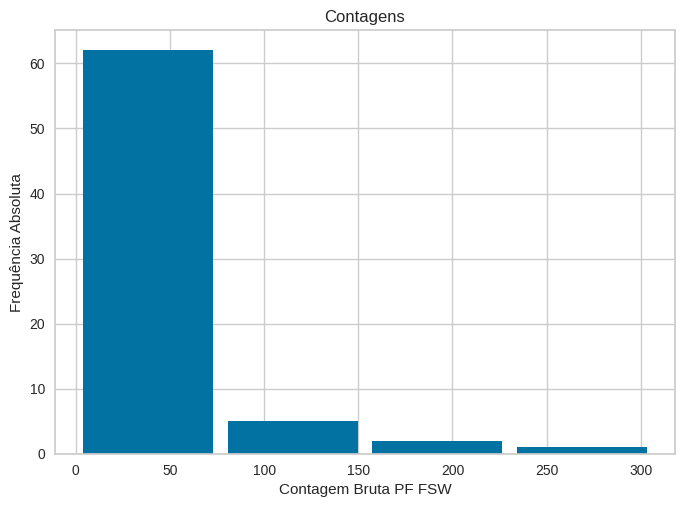

In [17]:
plt.hist(est['contagem_bruta_pf_fsw'], 4, rwidth=0.9)

plt.title('Contagens')
plt.xlabel('Contagem Bruta PF FSW')
plt.ylabel('Frequência Absoluta')
plt.show()


In [18]:
est.head()

,id,id_os,tipo_os,linguagem_programacao,prazo_contratual_dias_uteis,contagem_estimada_pf,contagem_bruta_pf_fsw,contagem_liquida_ajustada_pf_fsw,descricao,tempo_fsw_dias_uteis,tempo_trf1_dias_uteis,tempo_fsw_dias_corridos_exclui_feriados,tempo_trf1-d_corr_inc_fer,tempo_fws_seg_uteis,tempo_trf1_seg_uteis,tempo_fsw_seg_corr_exc_fer,tempo_trf1_seg_corr_inc_feriados
902,26014,EORCAMENTO-26,Manutencao Evolutiva,PHP,80.0,72.0,71.0,42.6,OS faturada,5d 6h 22m,132d 9h 58m,7d 6h 22m,374d 6h 58m,256920,6213500,627720,17528300
903,26016,EORCAMENTO-2,Manutencao Evolutiva,PHP,10.0,5.0,5.0,3.0,OS faturada,7d 1h 7m,168d 8h 58m,9d 1h 7m,468d 7h 58m,331620,7894690,781620,21931100
904,26021,EORCAMENTO-1,Manutencao Evolutiva,PHP,10.0,4.0,7.0,4.2,OS faturada,6d 0h 19m,111d 8h 58m,8d 0h 19m,313d 6h 58m,281940,5227110,692340,14673500
905,26022,EORCAMENTO-28,Manutencao Evolutiva,PHP,10.0,5.0,6.0,3.6,OS faturada,6d 5h 45m,111d 8h 53m,8d 5h 45m,313d 6h 53m,301500,5226830,711900,14673200
906,26026,EORCAMENTO-33,Manutencao Evolutiva,PHP,10.0,5.0,6.0,3.6,OS faturada,1d 6h 9m,116d 8h 51m,1d 6h 9m,326d 5h 51m,68940,5460710,108540,15277900


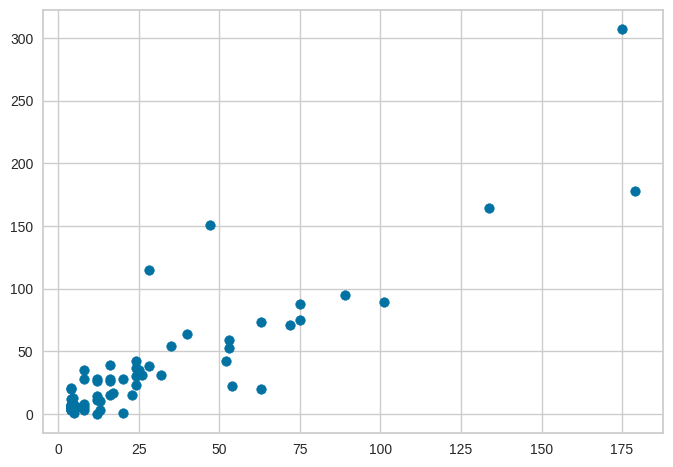

In [19]:
import matplotlib.pyplot as plt
plt.scatter(est['contagem_estimada_pf'],est['contagem_bruta_pf_fsw'])

# **Regressão Múltipla**

In [20]:
X2 = sm.add_constant(X)
X2_OLS = sm.OLS(y, X2)
X2_OLS = X2_OLS.fit()
print(X2_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     983.2
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.09e-54
Time:                        02:44:11   Log-Likelihood:                -208.87
No. Observations:                  70   AIC:                             425.7
Df Residuals:                      66   BIC:                             434.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3077      0.759      9.628      0.0

**Análise**

x1 = contagem estimada

x2 = contagem bruta

x3 = contagem liquida

Na regressão linear nula nossa variável x3 (contagem liquida apresentou 0.006) única variável que se mostrou menos significante, isso tem sentido pois a contagem liquida tem deflatores e glosas e tem menor coeficiente de explicação na sua regressão simples.



In [21]:
est[['prazo_contratual_dias_uteis','contagem_estimada_pf','contagem_bruta_pf_fsw','contagem_liquida_ajustada_pf_fsw']].corr()

,prazo_contratual_dias_uteis,contagem_estimada_pf,contagem_bruta_pf_fsw,contagem_liquida_ajustada_pf_fsw
prazo_contratual_dias_uteis,1.000000,0.985817,0.846179,0.834230
contagem_estimada_pf,0.985817,1.000000,0.886393,0.839960
contagem_bruta_pf_fsw,0.846179,0.886393,1.000000,0.880728
contagem_liquida_ajustada_pf_fsw,0.834230,0.839960,0.880728,1.000000


**Análise**

Com a função de correlação vemos que as váriaveis contagem_estimada_pf tem uma forte correlação com prazo_contratual_dias_uteis e contagem_bruta_pf_fsw também tem forte correlação com prazo_contratual_dias_uteis. Como já dito é uma surpresa pois o pensamento antes de analisar os dados era que a contagem estimada seria a pior variável para se analisar, devido a imprecisão e o momento que ela é realizada que é inicialmente no projeto.

Mas isso é válido quando fazemos as regressões dos tipos de OS manutenção evolutiva, quando se trata de projetos novos, esses valores mudam totalmente, na base também temos esses dados mas para o trabalho focamos apenas nas manuntenção evolutivas.

In [22]:
X3 = X[:,[0,1]]
#print(X3)
X3_OLS = sm.OLS(y, X3)
X3_OLS = X3_OLS.fit()
print(X3_OLS.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1080.
Date:                Tue, 13 May 2025   Prob (F-statistic):                    2.96e-52
Time:                        02:44:15   Log-Likelihood:                         -244.52
No. Observations:                  70   AIC:                                      493.0
Df Residuals:                      68   BIC:                                      497.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Análise**

Retirei a variável x3 = contagem liquida e rodei novamente nossa regressão, sendo que pouco alterou no nosso R² agora está em 0.969.


In [23]:
est = pd.read_csv('/content/gdrive/MyDrive/TRF/historicov3.csv',encoding='latin1') #charset
#est = est[est['tipo_os']=='Ordem de Servico'] #Estou carregando agora apenas os dados de novos projetos de desenvolvimento.
est = est[est['tipo_os']=='Manutencao Evolutiva']

est = est[est['descricao']=='OS faturada']

X = est.iloc[:,5:8].values
y = est.iloc[:,4].values

#print(X)

cont_est = np.reshape(X[:,0], (-1,1))
cont_bruta = np.reshape(X[:,1], (-1,1))
cont_liq = np.reshape(X[:,2], (-1,1))


#print(cont_bruta)
#
cont_est_lr = LinearRegression()
cont_est_lr.fit(cont_est, y)

#
cont_bruta_lr = LinearRegression()
cont_bruta_lr.fit(cont_bruta, y)


#
cont_liq_lr = LinearRegression()
cont_liq_lr.fit(cont_liq, y)

fig = go.Figure()

fig.add_trace(go.Scatter(x=cont_bruta.T[0], y=y, name='cont_bruta', mode='markers'))
fig.add_trace(go.Scatter(x=cont_est.T[0], y=y, name='cont_est', mode='markers'))
fig.add_trace(go.Scatter(x=cont_liq.T[0], y=y, name='cont_liq', mode='markers'))

fig.add_trace(go.Scatter(x=cont_bruta.T[0], y=cont_bruta_lr.predict(cont_bruta), mode='lines', name='cont_bruta'))
fig.add_trace(go.Scatter(x=cont_est.T[0], y=cont_est_lr.predict(cont_est), mode='lines', name='cont_est'))
fig.add_trace(go.Scatter(x=cont_liq.T[0], y=cont_liq_lr.predict(cont_liq), mode='lines', name='cont_liq'))

fig.update_layout(xaxis={"title": "Contagem"},
                  yaxis={"title": "Prazo em Dias"})

fig.show()

cont_bruta_lr.predict([[200.0]])
print(cont_bruta_lr.coef_[0], cont_bruta_lr.intercept_ )
print(cont_est_lr.coef_[0], cont_est_lr.intercept_ )

0.6046179959432864 9.55396434606826
0.8698293259682461 6.452139544358634


In [24]:
est.describe()

,id,prazo_contratual_dias_uteis,contagem_estimada_pf,contagem_bruta_pf_fsw,contagem_liquida_ajustada_pf_fsw,tempo_fws_seg_uteis,tempo_trf1_seg_uteis,tempo_fsw_seg_corr_exc_fer,tempo_trf1_seg_corr_inc_feriados
count,470.000000,470.000000,470.000000,470.000000,470.000000,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02
mean,34068.631915,21.189362,16.942660,19.244213,11.446830,8.668374e+05,3.761848e+06,2.237445e+06,1.066226e+07
std,9019.102462,21.283453,23.986053,28.515277,15.599356,1.237873e+06,3.065711e+06,3.211396e+06,8.206669e+06
min,25954.000000,2.000000,0.450000,0.000000,0.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,26314.500000,10.000000,4.000000,6.000000,3.600000,2.634712e+05,1.487172e+06,6.891300e+05,4.622232e+06
50%,29963.000000,10.000000,8.000000,9.000000,5.400000,4.427840e+05,2.924885e+06,1.143985e+06,8.557525e+06
75%,40432.750000,20.000000,20.000000,22.000000,12.870000,8.888198e+05,5.227388e+06,2.297522e+06,1.467342e+07
max,56002.000000,150.000000,208.000000,307.000000,141.640000,8.962300e+06,2.171570e+07,2.365030e+07,5.814770e+07


In [25]:
X2 = sm.add_constant(X)
X2_OLS = sm.OLS(y, X2)
X2_OLS = X2_OLS.fit()
print(X2_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     4125.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        02:44:27   Log-Likelihood:                -1324.3
No. Observations:                 470   AIC:                             2657.
Df Residuals:                     466   BIC:                             2673.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1510      0.236     26.028      0.0

In [26]:
X = est.iloc[:,5:8].values
y = est.iloc[:,4].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state = 42) #

#print(X)

lr = LinearRegression().fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9584178592845115
0.961387245145628


# **Regressão Rígida e Lasso**

In [27]:
lr_ridge = Ridge(alpha=20.0).fit(X_train,y_train)
print(lr_ridge.score(X_train,y_train))
print(lr_ridge.score(X_test,y_test))

0.9584176255034568
0.96167522788855


In [28]:
lr.coef_

array([ 0.80779081, -0.16434647,  0.34012984])

In [29]:
lr_ridge.coef_

array([ 0.80766782, -0.1621901 ,  0.3367342 ])

In [30]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

lr_scaler = LinearRegression().fit(X_train_scaler,y_train)
print(lr_scaler.score(X_train_scaler,y_train))
print(lr_scaler.score(X_test_scaler,y_test))

0.9584178592845115
0.9613872451456281


In [31]:
lr_ridge_scaler = Ridge(alpha=5.0).fit(X_train_scaler,y_train)

print(lr_ridge_scaler.score(X_train_scaler,y_train))
print(lr_ridge_scaler.score(X_test_scaler,y_test))

0.7694442753306051
0.8097788019428885


In [32]:
lr_lasso_scaler = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaler,y_train)

print(lr_lasso_scaler.score(X_train_scaler,y_train))
print(lr_lasso_scaler.score(X_test_scaler,y_test))

0.2737761216860687
0.2585092336274132


In [33]:
lr_lasso_scaler.coef_
np.sum(lr_lasso_scaler.coef_!=0)

np.int64(1)

**Análise**

Apresentou uma variável ao invés das 3 originais. Na prática eu poderia usar a regressão rígida e a lasso para melhorar meu modelo já que meu conjunto de dados não é muito grande.


In [34]:
#print(X2)
x = X2[:,2]*X2[:,3] #multiplicando a contagem bruta x contagem liquida
x =np.reshape(x, (-1,1))

#print(x)
X4 = np.append(X2, x , axis=1)

X4_OLS = sm.OLS(y, X4)
X4_OLS = X4_OLS.fit()
print(X4_OLS.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     4384.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        02:44:43   Log-Likelihood:                -1244.5
No. Observations:                 470   AIC:                             2499.
Df Residuals:                     465   BIC:                             2520.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2374      0.244     17.400      0.0

0.49949460377403676

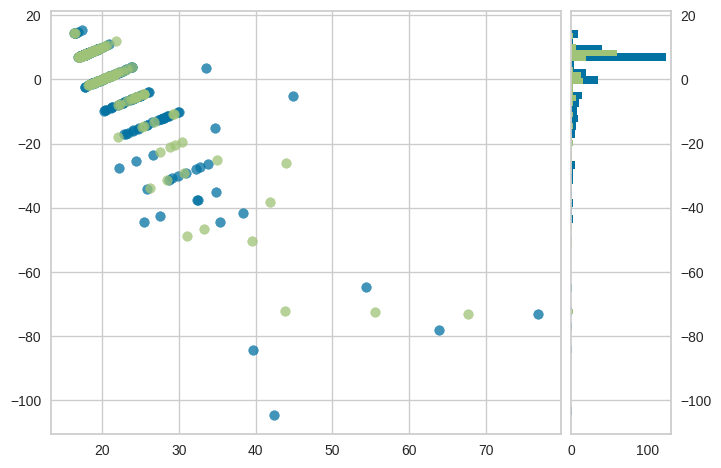

In [35]:
model = Ridge(alpha=20)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train_scaler, y_train)
visualizer.score(X_test_scaler, y_test)

# **Regressão Polinomial**

In [36]:
X = est.iloc[:,6:7].values
y = est.iloc[:,7].values

#print(X)

cont_brt = np.reshape(X[:,0], (-1,1))


#
cont_brt_lr = LinearRegression()
cont_brt_lr.fit(cont_brt, y)

fig = go.Figure()


fig.add_trace(go.Scatter(x=cont_brt.T[0], y=y, name='cont_brt', mode='markers'))


fig.add_trace(go.Scatter(x=cont_brt.T[0], y=cont_brt_lr.predict(cont_brt), mode='lines', name='cont_brt'))

fig.update_layout(xaxis={"title": "Contagem Bruta"},
                  yaxis={"title": "Contagem Liquida"})

fig.show()



In [37]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
#X

In [38]:
#print(X)

X5 = sm.add_constant(X_poly)
X5_OLS = sm.OLS(y, X5)
X5_OLS = X5_OLS.fit()
print(X5_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2243.
Date:                Tue, 13 May 2025   Prob (F-statistic):          2.45e-302
Time:                        02:44:55   Log-Likelihood:                -1250.2
No. Observations:                 470   AIC:                             2510.
Df Residuals:                     465   BIC:                             2531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6826      0.326     -2.097      0.0

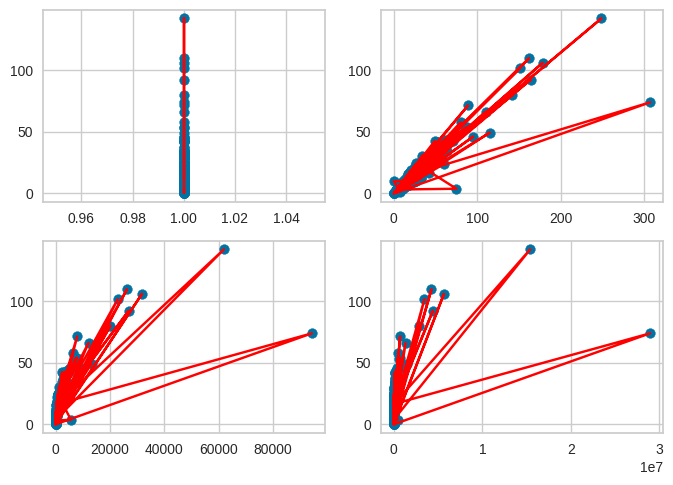

In [39]:
#
#print(X_poly)

fig, ax = plt.subplots(2,2)
ax[0,0].scatter(X_poly.T[0],y)
ax[0,0].plot(X_poly.T[0],y,color='red')


ax[0,1].scatter(X_poly.T[1],y)
ax[0,1].plot(X_poly.T[1],y,color='red')


ax[1,0].scatter(X_poly.T[2],y)
ax[1,0].plot(X_poly.T[2],y,color='red')

ax[1,1].scatter(X_poly.T[3],y)
ax[1,1].plot(X_poly.T[3],y,color='red')

**Análise**

Lendo o Livro Estatística Aplicada entendi que utilizando os ajustes que são o Linear, o Exponencial e o Polinomial teriamos coeficientes de explicação diferentes e poderíamos escolher qual usar que se ajuste melhor aos dados. Nos dados em estudo não soube utilizar muito bem, talvez mais alguns testes podem nos levar a ajustar esse valores

# Regression Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X, y)


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()

export_graphviz(regr, out_file=dot_data,feature_names=['contagem_estimada_pf'], class_names=None, filled=True)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'